# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

## Sigmoid Function

$$ g(x) = \frac{1}{1 + e^{-x}} $$

In [2]:
x = np.linspace(
    scipy.stats.logistic.ppf(0.001),
    scipy.stats.logistic.ppf(0.999), 100
)

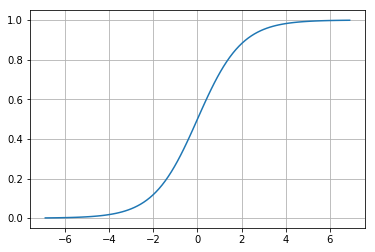

In [3]:
plt.plot(x, scipy.stats.logistic.cdf(x))
plt.grid()

In [4]:
def sigmoid(z):
    return (1 + np.exp(-z)) ** -1


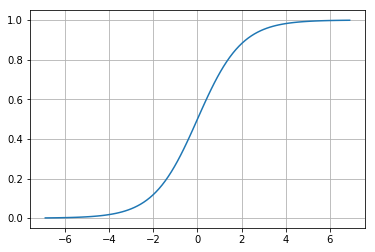

In [5]:
plt.plot(x, sigmoid(x))
plt.grid()

## Hypothesis Representation

$$ h_{\theta}(x) = g(\theta^T x) $$

$$ g(z) = \frac{1}{1 + e^{-z}} $$

$h_{\theta}$ gives a probability that output is 1.

$$ h_{\theta}(x) = P(y = 1 \mid x, \theta) =
1 - P(y = 0 \mid x, \theta) $$

$$ P(y = 1 \mid x, \theta) + P(y = 0 \mid x, \theta) = 1 $$

### Decision Boundary

Decision boundary translates output of hypothesis function to discrete 0 or 1 classifications:

$$ h_{\theta}(x) \geq 0.5 \implies y = 1 $$

$$ h_{\theta}(x) < 0.5 \implies y = 0 $$

Logistic function behaves like:

$$ g(z) \geq 0.5, z \geq 0 $$

Therefore:

$$ \theta^T x \geq 0 \implies y = 1 $$

$$ \theta^T x < 0 \implies y = 0 $$

## Logistic Regression Model

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data_filename = 'data/ex2data1.txt'
data = np.loadtxt(data_filename, delimiter=',')
data.shape

(100, 3)

In [8]:
raw_X = data[:, 0:2]
y = data[:, 2]

In [9]:
def plot_data(X, y, label1, label2):
    exam_1 = X[:, 0]
    exam_2 = X[:, 1]
    for i in [(0, label1), (1, label2)]:
        index = y == i[0]
        plt.scatter(
            exam_1[index],
            exam_2[index],
            label=i[1],
            alpha=0.5
        )


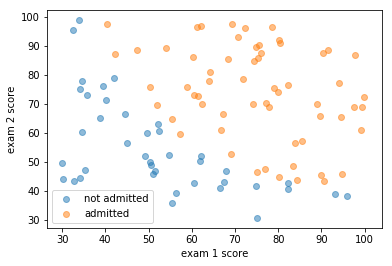

In [10]:
plot_data(raw_X, y, 'not admitted', 'admitted') 
plt.legend()
plt.xlabel('exam 1 score')
plt.ylabel('exam 2 score')

- $m$ is number of training examples
- $n$ is number of features

In [11]:
m, n = raw_X.shape
m, n

(100, 2)

In [12]:
X = np.concatenate((np.ones((m, 1)), raw_X), axis=1)
X.dtype

dtype('float64')

### Cost Function and Gradient

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}
(-y^{(i)} \log(h_{\theta}(x^{(i)}) - 
(1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} =
\frac{1}{m} \sum_{i=1}^{m}
(h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

In [13]:
# eplison so log will not fail on zeros
EPS = np.finfo(np.float64).eps

In [14]:
def cost_function(theta, X, y):
    m = y.shape[0]
    h_theta = sigmoid(X.dot(theta))
    m_inv = 1 / m
    J = m_inv * (-y.dot(np.log(h_theta + EPS)) - (1 - y).dot(np.log(1 - h_theta + EPS)))
    gradient = m_inv * (h_theta - y).dot(X)
    return J, gradient

In [15]:
cost_function(np.array([-24, 0.2, 0.2]), X, y)

(0.21833019382659735, array([ 0.04290299,  2.56623412,  2.64679737]))

In [16]:
from scipy.optimize import minimize

In [17]:
initial_theta = np.zeros(n + 1)
res = minimize(
    fun=lambda theta: cost_function(theta, X, y),
    x0=initial_theta,
    jac=True,
    options={'maxiter': 400, 'disp': True}
)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 24
         Function evaluations: 32
         Gradient evaluations: 32


In [18]:
print('success: ', res.success)
print('theta: ', res.x)
theta = res.x

success:  True
theta:  [-25.16115684   0.20623032   0.20147018]


### Plot Decision Boundary

The decision boudary is where $ \theta^T X = 0 $.

$$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $$
$$ x_2 = \frac{\theta_1 x_1 + \theta_0}{\theta_2} $$

In [19]:
# find end points, x1s
plot_x = np.array([min(X[:, 1]), max(X[:, 1])])
plot_x

array([ 30.05882245,  99.8278578 ])

In [20]:
# compute x2s
plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
plot_y

array([ 94.1187266 ,  22.70125633])

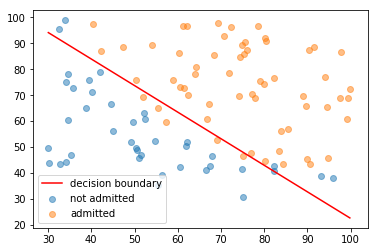

In [21]:
plot_data(raw_X, y, 'not admitted', 'admitted')
plt.plot(plot_x, plot_y, c='r', label='decision boundary')
plt.legend()

In [22]:
sigmoid(np.array([1, 45, 85]).dot(theta))

0.7762894342405029

### Compute Accuracy

In [23]:
def predict(theta, X):
    m = X.shape[0]
    return sigmoid(X.dot(theta)) >= 0.5
    
accuracy = np.mean(predict(theta, X) == y) * 100
print('train accuracy: {}%'.format(accuracy))

train accuracy: 89.0%


## Regularized Logistic Regression

In [24]:
data_filename_2 = 'data/ex2data2.txt'
data_2 = np.loadtxt(data_filename_2, delimiter=',')
data_2.shape

(118, 3)

In [25]:
raw_X_2 = data_2[:, 0:2]
y_2 = data_2[:, 2]

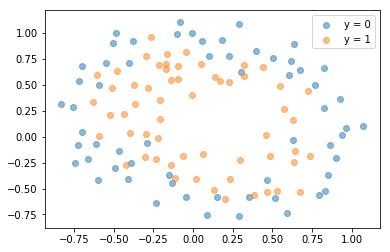

In [26]:
plot_data(raw_X_2, y_2, 'y = 0', 'y = 1')
plt.legend()

### Feature mapping

In [27]:
def mapFeature(X1, X2):
    degree = 6
    try:
        out = np.ones((X1.shape[0], 28))
    except IndexError:
        out = np.ones((1, 28))
    idx = 1
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out[:, idx] = (X1 ** (i - j)) * (X2 ** j)
            idx += 1
    return out

In [28]:
X_2 = mapFeature(raw_X_2[:, 0], raw_X_2[:, 1])
X_2.shape

(118, 28)

### Cost Function and Gradient with Regularization

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}
(-y^{(i)} \log(h_{\theta}(x^{(i)}) - 
(1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))
+ \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$$

$$ \frac{\partial J(\theta)}{\partial \theta_j} =
\frac{1}{m} \sum_{i=1}^{m}
(h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}, \quad j = 0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} =
\frac{1}{m} \sum_{i=1}^{m}
(h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}
+ \frac{\lambda}{m} \theta_j,
\quad j \ge 0 $$

In [29]:
def cost_function_reg(theta, X, y, lam):
    m = y.shape[0]
    h_theta = sigmoid(X.dot(theta))
    m_inv = 1 / m
    J = m_inv * (-y.dot(np.log(h_theta + EPS)) - (1 - y).dot(np.log(1 - h_theta + EPS)))
    J += (lam / (2 * m)) * np.sum(theta[1:] ** 2)
    gradient = m_inv * (h_theta - y).dot(X)
    gradient[1:] += (lam / m) * theta[1:]
    return J, gradient

In [30]:
lam = 1

initial_theta_2 = np.zeros(X_2.shape[1])
print(cost_function_reg(initial_theta_2, X_2, y_2, lam))

test_theta = np.ones(X_2.shape[1])
print(cost_function_reg(test_theta, X_2, y_2, lam))

(0.69314718055994484, array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02]))
(2.134848314665331, array([ 0.34604507,  0.08508073,  0.11852457,  0.1505916 ,  0.01591449,
        0.16811439,  0.06712094,  0.03217053,  0.02604321,  0.10719727,
        0.09725885,  0.01098433,  0.04195657,  0.00957212,  0.12367776,
        0.05895534,  0.01870409,  0.01729323,  0.02352665,  0.01513039,
        0.09858123,  0.07328323,  0.01051447,  0.02270567,  0.00904832,
        0.02563548,  0

In [31]:
res_2 = minimize(
    fun=lambda theta: cost_function_reg(theta, X_2, y_2, 1),
    x0=np.zeros(X_2.shape[1]),
    jac=True,
    options={'maxiter': 400, 'disp': True}
)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


In [32]:
accuracy_2 = np.mean(predict(res_2.x, X_2) == y_2) * 100
print('train accuracy: {}%'.format(accuracy_2))

train accuracy: 83.05084745762711%


In [33]:
def plot_decision_boudary(theta, X, y):
    min_val = min(X[:, 0])
    max_val = max(X[:, 1])
    u = np.linspace(min_val, max_val)
    v = np.linspace(min_val, max_val)
    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(u.shape[0]):
        for j in range(v.shape[0]):
            z[i, j] = mapFeature(u[i], v[j]).dot(theta)
    plot_data(X, y, 'y = 0', 'y = 1')
    plt.legend()
    plt.contour(u, v, z.T, levels=[0])

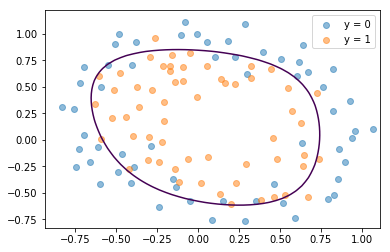

In [34]:
plot_decision_boudary(res_2.x, raw_X_2, y_2)

### Overfitting

$$ \lambda = 0 $$

         Current function value: 0.263499
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401


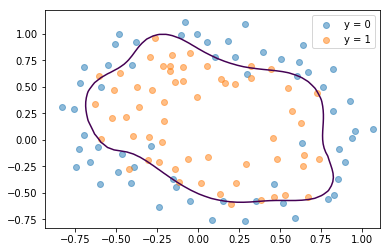

In [35]:
res_3 = minimize(
    fun=lambda theta: cost_function_reg(theta, X_2, y_2, 0),
    x0=np.zeros(X_2.shape[1]),
    jac=True,
    options={'maxiter': 400, 'disp': True}
)
plot_decision_boudary(res_3.x, raw_X_2, y_2)

### Underfitting

$$ \lambda = 100 $$

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


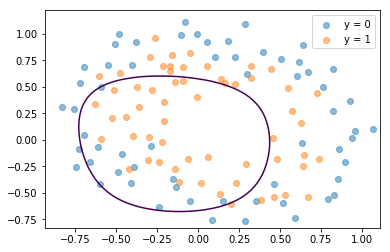

In [36]:
res_4 = minimize(
    fun=lambda theta: cost_function_reg(theta, X_2, y_2, 100),
    x0=np.zeros(X_2.shape[1]),
    jac=True,
    options={'maxiter': 400, 'disp': True}
)
plot_decision_boudary(res_4.x, raw_X_2, y_2)